In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import minimize
import sys

%matplotlib inline

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [63]:
class Quad:
    def __init__(self, A: np.ndarray, b: np.ndarray):
        self.A = A
        self.b = b
        
    def evaluate(self, x):
        return 0.5 * x.T @ self.A @ x + self.b.T @ x
    
    def d(self, x):
        return self.A @ x + self.b
    
    def ges(self, x):
        return self.A
        


class Rosenbrock:
    def evaluate(self, x):
        x1, x2 = x
        return 100 * (x2 - x1**2)**2 + (1 - x1)**2
    
    def d(self, x):
        x1, x2 = x
        dx1 = -400 * (x2 - x1**2) * x1 - 2 * (1 - x1) 
        dx2 = 200 * (x2 - x1**2)
        return np.array([dx1, dx2])
    
    def ges(self, x):
        x1, x2 = x
        gesse = np.array([[1200 * x1**2 + 2, -400 * x1],
                          [-400 * x1, 200]])
        return gesse

    
class N4:
    def evaluate(self, x):
        return x**4
        
    def d(self, x):
        return 4 * x**3
    
    def ges(self, x):
        res = 12 * x**2
        res.shape = (1,1)
        return res
    
    
class Newton:
    def __init__(self, function, x0, alpha):
        self.f = function
        self.x0 = x0.copy()
        self.xk = x0.copy()
        self.hist_xk = [x0.copy()]
        self.hist_yk = [self.f.evaluate(x0)]
        self.alpha = alpha
        
    def extremum(self, n_iter):
        for i in range(n_iter):
            self.xk = self.xk - self.alpha * np.linalg.inv(self.f.ges(self.xk)).dot(self.f.d(self.xk))
            self.hist_xk.append(self.xk.copy())
            self.hist_yk.append(self.f.evaluate(self.xk))
        return self
    
    def plot2d(self, r):
        u = np.linspace(-r, r, 300)
        x, y = np.meshgrid(u,u)
        grid = np.dstack([x, y])
        z = np.apply_along_axis(self.f.evaluate, 2, grid)
        
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].contour(x, y, z, levels=np.logspace(0, 5, 50), norm=LogNorm(), cmap=plt.cm.jet)
        ax[0].plot(*self.xk, 'r*', markersize=18, label="xk")
        ax[0].plot(*self.x0, 'r+', markersize=18, label="x0")
        ax[0].legend()
        
        ax[1].plot(self.hist_yk, '.-', )
        ax[1].set_title("График сходимости")
    
    def plot1d(self, r):
        x = np.linspace(-r, r, 300)
        y = self.f.evaluate(x)
        plt.plot(x, y)
        plt.plot(self.hist_xk, self.hist_yk, 'r.')

### Квадратичная функция

Newton: [-0.42553191  0.55319149]
scipy: [-0.42553191  0.55319149]


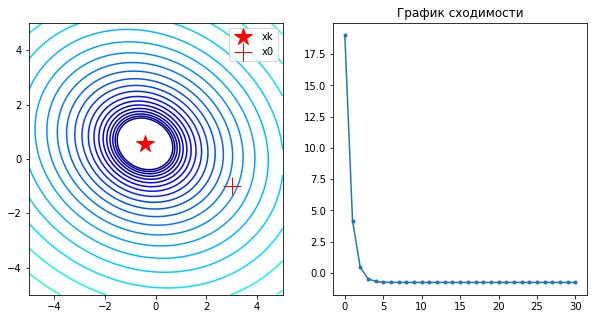

In [64]:
A = np.array(
    [[3., 0.5],
     [0.5, 4.]],
)
b = np.array(
    [1., -2.]
)
q = Quad(A=A, b=b)
x0 = np.array([3.0, -1])
alpha = 0.5

q_m = Newton(function=q, x0=x0, alpha=alpha).extremum(n_iter=30)
scipy_x = minimize(q.evaluate, x0=x0, method="L-BFGS-B").x

print("Newton:", q_m.xk)
print("scipy:", scipy_x)

q_m.plot2d(5)

### Розенброк

Newton: [1.02887222 1.05857803]
scipy: [0.99999704 0.99999407]


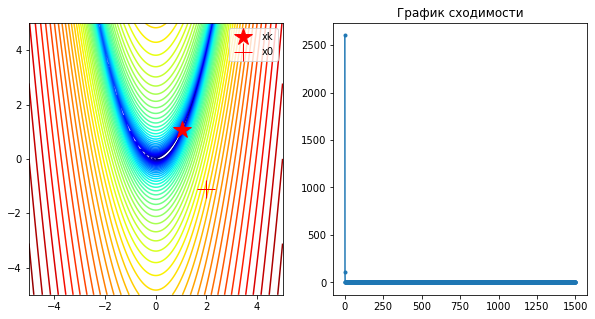

In [65]:
r = Rosenbrock()
x0 = np.array([2.0, -1.1])
alpha = 0.8

r_m = Newton(function=r, x0=x0, alpha=alpha).extremum(1500)
scipy_x = minimize(r.evaluate, x0=x0, method="L-BFGS-B").x

print("Newton:", r_m.xk)
print("scipy:", scipy_x)

r_m.plot2d(5)

### Полином

Newton: [-0.00014021]
scipy: [-0.01085005]


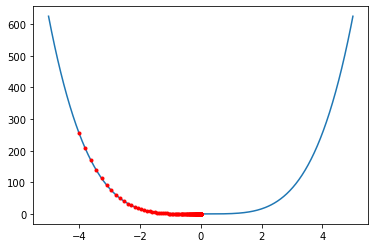

In [66]:
p = N4()
x0 = np.array([-4.])
alpha = 0.15

p_m = Newton(function=p, x0=x0, alpha=alpha).extremum(200)
scipy_x = minimize(p.evaluate, x0=x0, method="L-BFGS-B").x

print("Newton:", p_m.xk)
print("scipy:", scipy_x)

p_m.plot1d(5)